Using ZigZag
===
[ZigZag](https://pypi.python.org/pypi/ZigZag) is a (very) small library [I](http://twitter.com/generativist) wrote for calculating the peaks and valleys of a sequence (e.g. time series data). It also can calculate the [maximum drawdown](http://en.wikipedia.org/wiki/Drawdown_(economics)), a useful metric for trading analysis. The repository is on github at [https://github.com/jbn/ZigZag](https://github.com/jbn/ZigZag). Prior to version `0.1.4` it optionally used [`numba`](https://github.com/numba/numba); starting with version `0.1.4`, I switched to [`Cython`](http://cython.org/). 

This notebook demonstrates how to use ZigZag, and draws attention to a few caveats.

Installation
---
`pip install zigzag`

Basic Usage
---

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from zigzag import *

In [32]:
pip install zigzag

Note: you may need to restart the kernel to use updated packages.


In [34]:
# This is not nessessary to use zigzag. It's only here so that
# this example is reproducible.
np.random.seed(1997)

In [35]:
X = np.cumprod(1 + np.random.randn(100) * 0.01)
pivots = peak_valley_pivots(X, 0.03, -0.03)

In [36]:
def plot_pivots(X, pivots):
    plt.xlim(0, len(X))
    plt.ylim(X.min()*0.99, X.max()*1.01)
    plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
    plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
    plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
    plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

The following plot illustrates how the sequence was annotated. 

heeekkkkee
Date
2016-01-04     741.840027
2016-01-05     742.580017
2016-01-06     743.619995
2016-01-07     726.390015
2016-01-08     714.469971
                 ...     
2020-12-23    1732.380005
2020-12-24    1738.849976
2020-12-28    1776.089966
2020-12-29    1758.719971
2020-12-30    1739.520020
Name: Adj Close, Length: 1258, dtype: float64


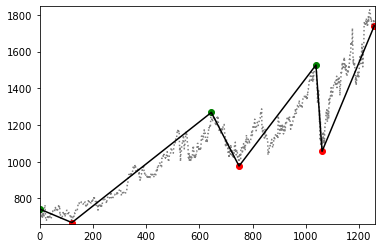

In [53]:
plot_pivots(X, pivots)
print('heeekkkkee')
pivots
print(X)

The following shows how you can use `pivots_to_modes` to inspect the segments.

In [39]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe().unstack()

count  -1    43.000000
        1    56.000000
mean   -1    -0.004875
        1     0.005506
std    -1     0.009995
        1     0.009663
min    -1    -0.025602
        1    -0.018131
25%    -1    -0.011249
        1     0.000144
50%    -1    -0.005225
        1     0.004643
75%    -1     0.000075
        1     0.010315
max    -1     0.017768
        1     0.028133
dtype: float64

Calculate the peak to valley returns for all of the segments.

In [40]:
compute_segment_returns(X, pivots)

array([ 0.09370263, -0.05981991,  0.07204542, -0.03419711,  0.04289563,
       -0.04197655,  0.03001853, -0.05506552,  0.07707074, -0.016124  ])

Finally, compute the oft-quoted (in financial literature) `max_drawdown`.

In [41]:
max_drawdown(X)

0.06755575755355037

Pandas Compatability
---
The `peak_valley_pivots` function works on pandas `series` assuming the index is either a DateTimeIndex or is \[0, n). [Pandas](http://pandas.pydata.org/) is great.

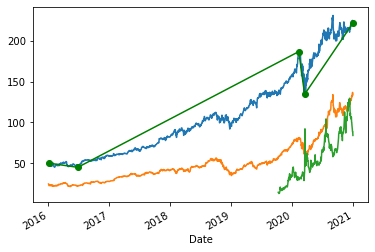

In [60]:
from pandas_datareader import get_data_yahoo

X = get_data_yahoo('MSFT')['Adj Close']
Z = get_data_yahoo('AAPL')['Adj Close']
B = get_data_yahoo('BNTX')['Adj Close']
pivots = peak_valley_pivots(X.values, 0.2, -0.2)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
X.plot()
Z.plot()
B.plot()
ts_pivots.plot(style='g-o');

In [46]:
pip install pandas_datareader

     |████████████████████████████████| 107 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 13.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [80]:
import os
import pandas as pd
import numpy as np
np.random.seed(1337)
print('ddddkkk')
import requests, zipfile, StringIO
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
print('dddd')

ddddkkk


ModuleNotFoundError: No module named 'StringIO'

In [81]:

import io
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    

    import requests, zipfile

from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
print('dddd')

dddd


In [79]:
pip install tensorflow


     |████████████████████████████████| 394.7 MB 6.5 kB/s  eta 0:00:01    |██████▊                         | 83.2 MB 48.1 MB/s eta 0:00:07     |████████▌                       | 104.8 MB 48.1 MB/s eta 0:00:07     |█████████████████████▋          | 266.6 MB 35.7 MB/s eta 0:00:04     |█████████████████████████████▉  | 367.7 MB 30.0 MB/s eta 0:00:01     |███████████████████████████████▋| 389.4 MB 46.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 37 kB/s s eta 0:00:01
     |████████████████████████████████| 127 kB 38.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 60.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 10.6 MB 27.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 29.1 MB/s eta 0:00:01
     |████████████████████████

In [82]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows=50

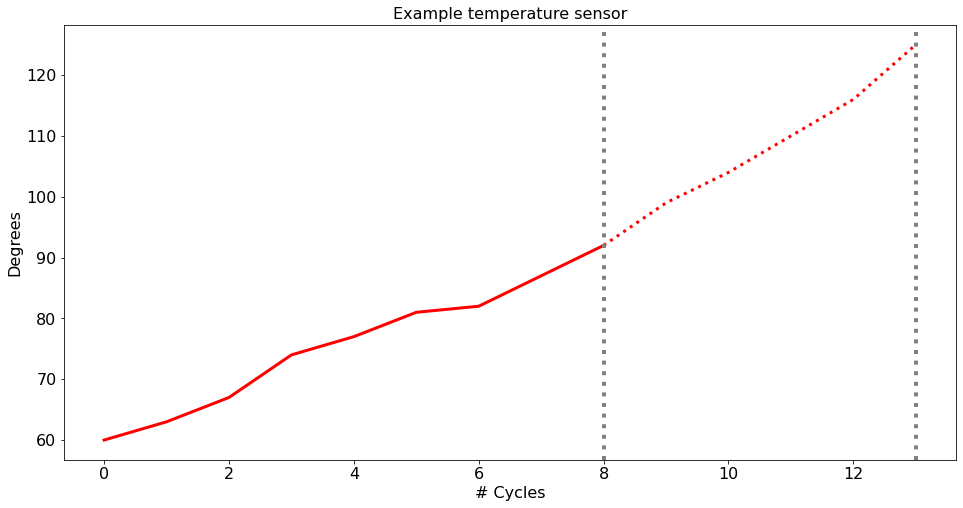

In [83]:
A=[60,63,67,74,77,81,82,87,92]
B=[92,99,104,110,116,125]
C = np.append(np.repeat(np.nan, len(A)-1), B)
plt.figure(figsize = (16, 8))
plt.plot(A, color='red', linewidth=3)
plt.plot(C, 'r:', linewidth=3)
plt.axvline(x=len(A)-1, color='grey', linestyle=':', linewidth=4)
plt.axvline(x=len(C)-1, color='grey', linestyle=':', linewidth=4)
plt.title('Example temperature sensor', fontsize=16)
plt.xlabel('# Cycles', fontsize=16)
plt.ylabel('Degrees', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [92]:
print('downll')
import requests

download_url = 'https://ti.arc.nasa.gov/c/6'
filename = 'CMAPSSData.zip'
r = requests.get(download_url + filename)

#r = requests.get('https://ti.arc.nasa.gov/c/6', stream=True)

#z = zipfile.ZipFile(StringIO.StringIO(r.content))
#z.extractall()


downll


SSLError: HTTPSConnectionPool(host='ti.arc.nasa.gov', port=443): Max retries exceeded with url: /c/6CMAPSSData.zip (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))

In [93]:
hwclock

NameError: name 'hwclock' is not defined

In [94]:
date

NameError: name 'date' is not defined

In [95]:
ll

total 16
-rw-r--r-- 1 jovyan 5088 Dec 30 23:15 core.pyx
-rw-r--r-- 1 jovyan  405 Dec 30 23:15 __init__.py
drwxr-xr-x 2 jovyan 4096 Dec 30 23:16 __pycache__/


In [96]:
cd ..

/home/jovyan/binder/ZigZag


In [97]:
cd ..

/home/jovyan/binder


In [98]:
ll

total 24
-rw-r--r-- 1 jovyan    8 Oct 29 10:01 apt.txt
-rw-r--r-- 1 jovyan  226 Oct 29 10:01 environment.yml
-rw-r--r-- 1 jovyan 2202 Dec 30 23:13 Index.ipynb
-rw-r--r-- 1 jovyan 5736 Dec 30 23:17 Untitled.ipynb
drwxr-xr-x 6 jovyan 4096 Dec 31 00:14 ZigZag/


In [99]:
ll

total 24
-rw-r--r-- 1 jovyan    8 Oct 29 10:01 apt.txt
-rw-r--r-- 1 jovyan  226 Oct 29 10:01 environment.yml
-rw-r--r-- 1 jovyan 2202 Dec 30 23:13 Index.ipynb
-rw-r--r-- 1 jovyan 5736 Dec 30 23:17 Untitled.ipynb
drwxr-xr-x 6 jovyan 4096 Dec 31 00:18 ZigZag/


In [100]:
ll

total 24
-rw-r--r-- 1 jovyan    8 Oct 29 10:01 apt.txt
-rw-r--r-- 1 jovyan  226 Oct 29 10:01 environment.yml
-rw-r--r-- 1 jovyan 2202 Dec 30 23:13 Index.ipynb
-rw-r--r-- 1 jovyan 5736 Dec 30 23:17 Untitled.ipynb
drwxr-xr-x 6 jovyan 4096 Dec 31 00:19 ZigZag/


In [101]:
ls

apt.txt  environment.yml  Index.ipynb  Untitled.ipynb  ZigZag/


In [102]:
ll

total 24
-rw-r--r-- 1 jovyan    8 Oct 29 10:01 apt.txt
-rw-r--r-- 1 jovyan  226 Oct 29 10:01 environment.yml
-rw-r--r-- 1 jovyan 2202 Dec 30 23:13 Index.ipynb
-rw-r--r-- 1 jovyan 5736 Dec 30 23:17 Untitled.ipynb
drwxr-xr-x 6 jovyan 4096 Dec 31 00:19 ZigZag/


In [103]:
cd ZigZag

/home/jovyan/binder/ZigZag


In [104]:
ll

total 44080
-rw-r--r-- 1 jovyan      656 Dec 30 23:15 appveyor.yml
-rw-r--r-- 1 jovyan      535 Dec 30 23:15 CHANGES.txt
-rw-r--r-- 1 jovyan     1489 Dec 30 23:15 LICENSE.txt
-rw-r--r-- 1 jovyan     1139 Dec 30 23:15 Makefile
-rw-r--r-- 1 jovyan      106 Dec 30 23:15 MANIFEST.in
-rw-r--r-- 1 jovyan     1397 Dec 30 23:15 README.rst
-rw-r--r-- 1 jovyan       13 Dec 30 23:15 requirements.txt
-rw-r--r-- 1 jovyan      429 Dec 31 00:18 RUL_FD001.txt
-rw-r--r-- 1 jovyan     1110 Dec 31 00:18 RUL_FD002.txt
-rw-r--r-- 1 jovyan      428 Dec 31 00:18 RUL_FD003.txt
-rw-r--r-- 1 jovyan     1084 Dec 31 00:18 RUL_FD004.txt
-rw-r--r-- 1 jovyan     3170 Dec 30 23:15 setup.py
-rw-r--r-- 1 jovyan  2228855 Dec 31 00:19 test_FD001.txt
-rw-r--r-- 1 jovyan  5734587 Dec 31 00:19 test_FD002.txt
-rw-r--r-- 1 jovyan  2826651 Dec 31 00:19 test_FD003.txt
-rw-r--r-- 1 jovyan  6957759 Dec 31 00:20 test_FD004.txt
drwxr-xr-x 2 jovyan     4096 Dec 30 23:15 tests/
-rw-r--r-- 1 jovyan  3515356 Dec 31 00:19 train_FD001.tx

In [105]:
train = pd.read_csv('train_FD001.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)
test = pd.read_csv('test_FD001.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)
RUL = pd.read_csv('RUL_FD001.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'train_FD001.csv'

In [106]:
ll

total 44084
-rw-r--r-- 1 jovyan      656 Dec 30 23:15 appveyor.yml
-rw-r--r-- 1 jovyan      535 Dec 30 23:15 CHANGES.txt
-rw-r--r-- 1 jovyan     1489 Dec 30 23:15 LICENSE.txt
-rw-r--r-- 1 jovyan     1139 Dec 30 23:15 Makefile
-rw-r--r-- 1 jovyan      106 Dec 30 23:15 MANIFEST.in
-rw-r--r-- 1 jovyan     1397 Dec 30 23:15 README.rst
-rw-r--r-- 1 jovyan       13 Dec 30 23:15 requirements.txt
-rw-r--r-- 1 jovyan      429 Dec 31 00:18 RUL_FD001.txt
-rw-r--r-- 1 jovyan     1110 Dec 31 00:18 RUL_FD002.txt
-rw-r--r-- 1 jovyan      428 Dec 31 00:18 RUL_FD003.txt
-rw-r--r-- 1 jovyan     1084 Dec 31 00:18 RUL_FD004.txt
-rw-r--r-- 1 jovyan     3170 Dec 30 23:15 setup.py
-rw-r--r-- 1 jovyan  2228855 Dec 31 00:19 test_FD001.txt
-rw-r--r-- 1 jovyan  5734587 Dec 31 00:19 test_FD002.txt
-rw-r--r-- 1 jovyan  2826651 Dec 31 00:19 test_FD003.txt
-rw-r--r-- 1 jovyan  6957759 Dec 31 00:20 test_FD004.txt
drwxr-xr-x 2 jovyan     4096 Dec 30 23:15 tests/
-rw-r--r-- 1 jovyan  3515356 Dec 31 00:19 train_FD001.tx

In [107]:
train = pd.read_csv('train_FD001.txt', parse_dates=False, delimiter=" ", decimal=".", header=None)
test = pd.read_csv('test_FD001.txt', parse_dates=False, delimiter=" ", decimal=".", header=None)
RUL = pd.read_csv('RUL_FD001.txt', parse_dates=False, delimiter=" ", decimal=".", header=None)

In [108]:
tableNA = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1)
tableNA.columns = ['train', 'test']
tableNA

,train,test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [109]:
train.drop(train.columns[[-1,-2]], axis=1, inplace=True)
test.drop(test.columns[[-1,-2]], axis=1, inplace=True)

In [110]:
tableNA


,train,test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [111]:
cols = ['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
train.columns = cols
test.columns = cols

In [112]:
train.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.001,-0.000,100.000,518.670,641.820,1589.700,1400.600,14.620,...,521.660,2388.020,8138.620,8.419,0.030,392,2388,100.000,39.060,23.419
1,1,2,0.002,-0.000,100.000,518.670,642.150,1591.820,1403.140,14.620,...,522.280,2388.070,8131.490,8.432,0.030,392,2388,100.000,39.000,23.424
2,1,3,-0.004,0.000,100.000,518.670,642.350,1587.990,1404.200,14.620,...,522.420,2388.030,8133.230,8.418,0.030,390,2388,100.000,38.950,23.344
3,1,4,0.001,0.000,100.000,518.670,642.350,1582.790,1401.870,14.620,...,522.860,2388.080,8133.830,8.368,0.030,392,2388,100.000,38.880,23.374
4,1,5,-0.002,-0.000,100.000,518.670,642.370,1582.850,1406.220,14.620,...,522.190,2388.040,8133.800,8.429,0.030,393,2388,100.000,38.900,23.404


In [114]:
test.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.002,0.000,100.000,518.670,643.020,1585.290,1398.210,14.620,...,521.720,2388.030,8125.550,8.405,0.030,392,2388,100.000,38.860,23.373
1,1,2,-0.003,-0.000,100.000,518.670,641.710,1588.450,1395.420,14.620,...,522.160,2388.060,8139.620,8.380,0.030,393,2388,100.000,39.020,23.392
2,1,3,0.000,0.000,100.000,518.670,642.460,1586.940,1401.340,14.620,...,521.970,2388.030,8130.100,8.444,0.030,393,2388,100.000,39.080,23.417
3,1,4,0.004,0.000,100.000,518.670,642.440,1584.120,1406.420,14.620,...,521.380,2388.050,8132.900,8.392,0.030,391,2388,100.000,39.000,23.374
4,1,5,0.001,0.000,100.000,518.670,642.510,1587.190,1401.920,14.620,...,522.150,2388.030,8129.540,8.403,0.030,390,2388,100.000,38.990,23.413


In [115]:
RUL.head()

,0,1
0,112,nan
1,98,nan
2,69,nan
3,82,nan
4,91,nan


In [116]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,20631.000,51.507,29.228,1.000,26.000,52.000,77.000,100.000
cycles,20631.000,108.808,68.881,1.000,52.000,104.000,156.000,362.000
op_setting1,20631.000,-0.000,0.002,-0.009,-0.002,0.000,0.002,0.009
op_setting2,20631.000,0.000,0.000,-0.001,-0.000,0.000,0.000,0.001
op_setting3,20631.000,100.000,0.000,100.000,100.000,100.000,100.000,100.000
s1,20631.000,518.670,0.000,518.670,518.670,518.670,518.670,518.670
s2,20631.000,642.681,0.500,641.210,642.325,642.640,643.000,644.530
s3,20631.000,1590.523,6.131,1571.040,1586.260,1590.100,1594.380,1616.910
s4,20631.000,1408.934,9.001,1382.250,1402.360,1408.040,1414.555,1441.490
s5,20631.000,14.620,0.000,14.620,14.620,14.620,14.620,14.620


In [117]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,13096.000,51.544,28.289,1.000,28.000,52.000,76.000,100.000
cycles,13096.000,76.837,53.058,1.000,33.000,69.000,113.000,303.000
op_setting1,13096.000,-0.000,0.002,-0.008,-0.002,0.000,0.002,0.008
op_setting2,13096.000,0.000,0.000,-0.001,-0.000,0.000,0.000,0.001
op_setting3,13096.000,100.000,0.000,100.000,100.000,100.000,100.000,100.000
s1,13096.000,518.670,0.000,518.670,518.670,518.670,518.670,518.670
s2,13096.000,642.475,0.401,641.130,642.197,642.460,642.740,644.300
s3,13096.000,1588.099,5.003,1569.040,1584.600,1587.990,1591.362,1607.550
s4,13096.000,1404.735,6.688,1384.390,1399.950,1404.440,1409.050,1433.360
s5,13096.000,14.620,0.000,14.620,14.620,14.620,14.620,14.620


In [118]:
RUL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,100.000,75.520,41.765,7.000,32.750,86.000,112.250,145.000
1,0.000,nan,nan,nan,nan,nan,nan,nan


In [119]:
train.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'op_setting3'], axis=1, inplace=True)
test.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'op_setting3'], axis=1, inplace=True)

In [120]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,20631.000,51.507,29.228,1.000,26.000,52.000,77.000,100.000
cycles,20631.000,108.808,68.881,1.000,52.000,104.000,156.000,362.000
op_setting1,20631.000,-0.000,0.002,-0.009,-0.002,0.000,0.002,0.009
op_setting2,20631.000,0.000,0.000,-0.001,-0.000,0.000,0.000,0.001
s2,20631.000,642.681,0.500,641.210,642.325,642.640,643.000,644.530
s3,20631.000,1590.523,6.131,1571.040,1586.260,1590.100,1594.380,1616.910
s4,20631.000,1408.934,9.001,1382.250,1402.360,1408.040,1414.555,1441.490
s6,20631.000,21.610,0.001,21.600,21.610,21.610,21.610,21.610
s7,20631.000,553.368,0.885,549.850,552.810,553.440,554.010,556.060
s8,20631.000,2388.097,0.071,2387.900,2388.050,2388.090,2388.140,2388.560


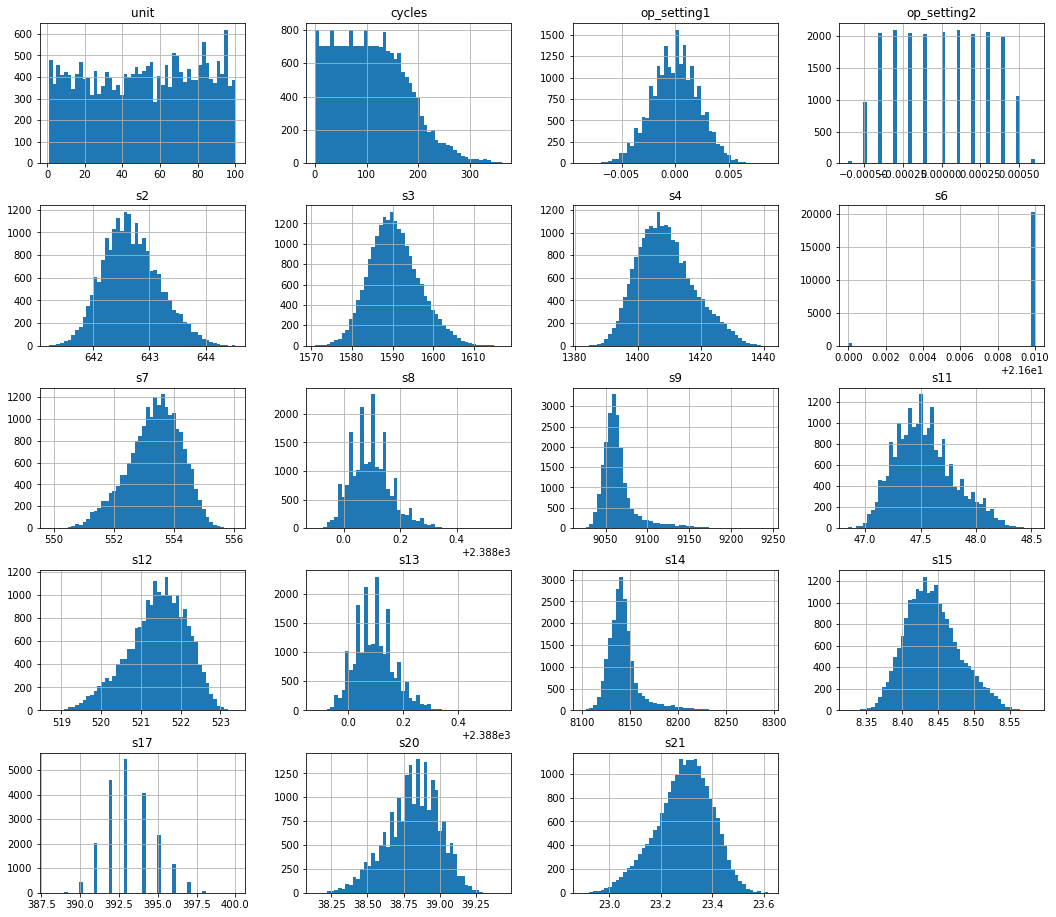

In [121]:
train.hist(bins=50, figsize=(18,16))
plt.show()

In [123]:
cyclestrain = train.groupby('unit', as_index=False)['cycles'].max()
cyclestest = test.groupby('unit', as_index=False)['cycles'].max()

In [124]:
cyclestrain.head()

,unit,cycles
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


In [125]:
cyclestest.head()

,unit,cycles
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


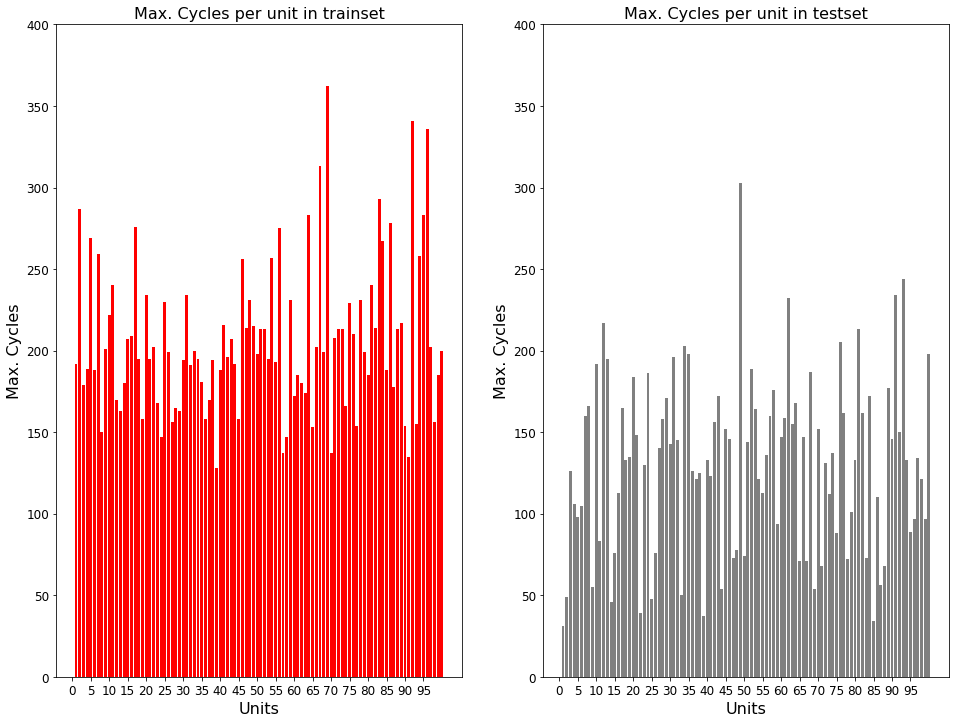

In [126]:
fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)
bar_labels = list(cyclestrain['unit'])
bars = plt.bar(list(cyclestrain['unit']), cyclestrain['cycles'], color='red')
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in trainset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.bar(list(cyclestest['unit']), cyclestest['cycles'], color='grey')
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in testset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

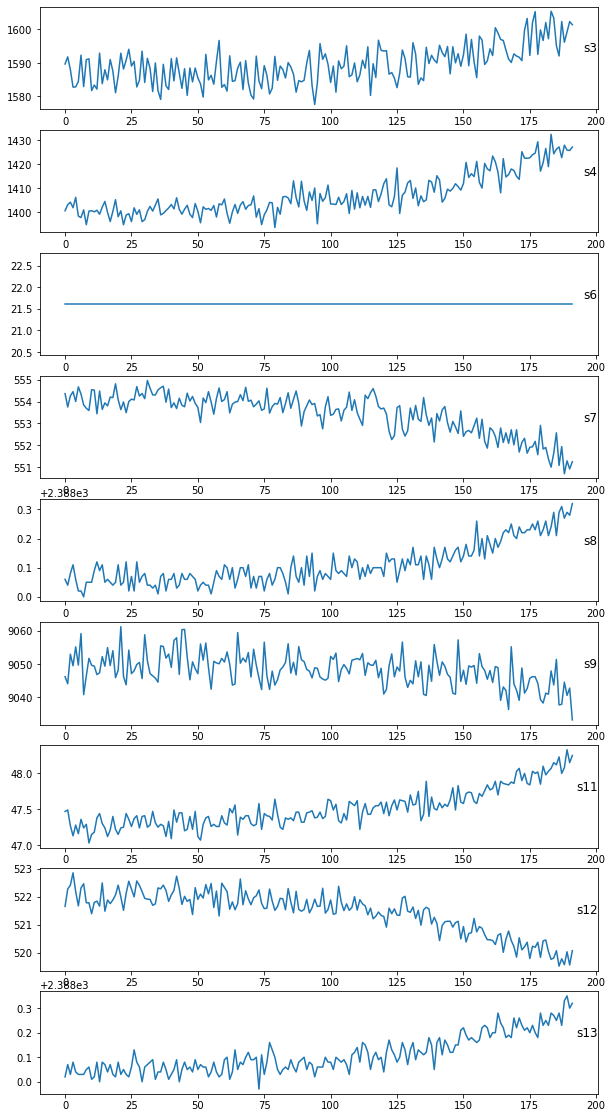

In [127]:
values = train[train.unit==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(train.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

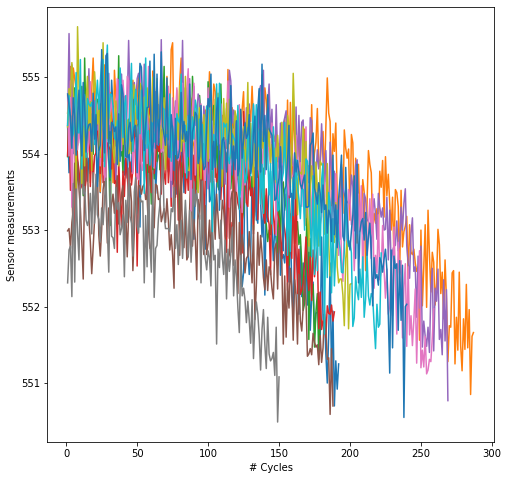

In [128]:
plt.figure(figsize = (8, 8))
plt.plot(train[train.unit==1].cycles, train[train.unit==1].s7)
plt.plot(train[train.unit==2].cycles, train[train.unit==2].s7)
plt.plot(train[train.unit==3].cycles, train[train.unit==3].s7)
plt.plot(train[train.unit==4].cycles, train[train.unit==4].s7)
plt.plot(train[train.unit==5].cycles, train[train.unit==5].s7)
plt.plot(train[train.unit==6].cycles, train[train.unit==6].s7)
plt.plot(train[train.unit==7].cycles, train[train.unit==7].s7)
plt.plot(train[train.unit==8].cycles, train[train.unit==8].s7)
plt.plot(train[train.unit==9].cycles, train[train.unit==9].s7)
plt.plot(train[train.unit==10].cycles, train[train.unit==10].s7)
plt.plot(train[train.unit==11].cycles, train[train.unit==11].s7)
plt.xlabel('# Cycles')
plt.ylabel('Sensor measurements')
plt.show()

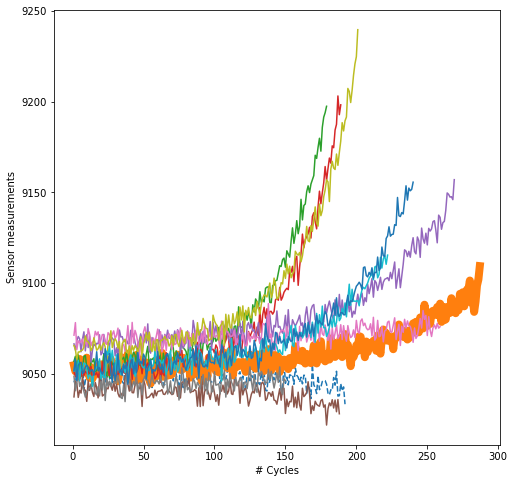

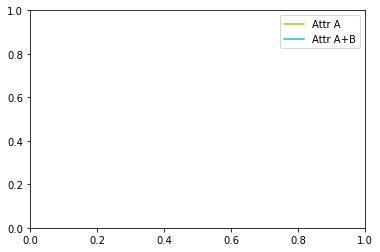

In [141]:
plt.figure(figsize = (8, 8))
plt.plot(train[train.unit==1].cycles, train[train.unit==1].s9, label="unit1", linestyle='--')
plt.plot(train[train.unit==2].cycles, train[train.unit==2].s9, label="UNIT2", linewidth=8)
plt.plot(train[train.unit==3].cycles, train[train.unit==3].s9)
plt.plot(train[train.unit==4].cycles, train[train.unit==4].s9)
plt.plot(train[train.unit==5].cycles, train[train.unit==5].s9)
plt.plot(train[train.unit==6].cycles, train[train.unit==6].s9)
plt.plot(train[train.unit==7].cycles, train[train.unit==7].s9)
plt.plot(train[train.unit==8].cycles, train[train.unit==8].s9)
unit9, = plt.plot(train[train.unit==9].cycles, train[train.unit==9].s9)
unit10, = plt.plot(train[train.unit==10].cycles, train[train.unit==10].s9)
plt.plot(train[train.unit==11].cycles, train[train.unit==11].s9)
plt.xlabel('# Cycles')
plt.ylabel('Sensor measurements')
plt.show()



plt.legend([unit9,unit10], ["Attr A", "Attr A+B"])

In [142]:
minb = train.groupby('unit', as_index=False).min().head(10)
maxb = train.groupby('unit', as_index=False).max().head(10)
mmtable = minb.append(maxb, ignore_index=True)

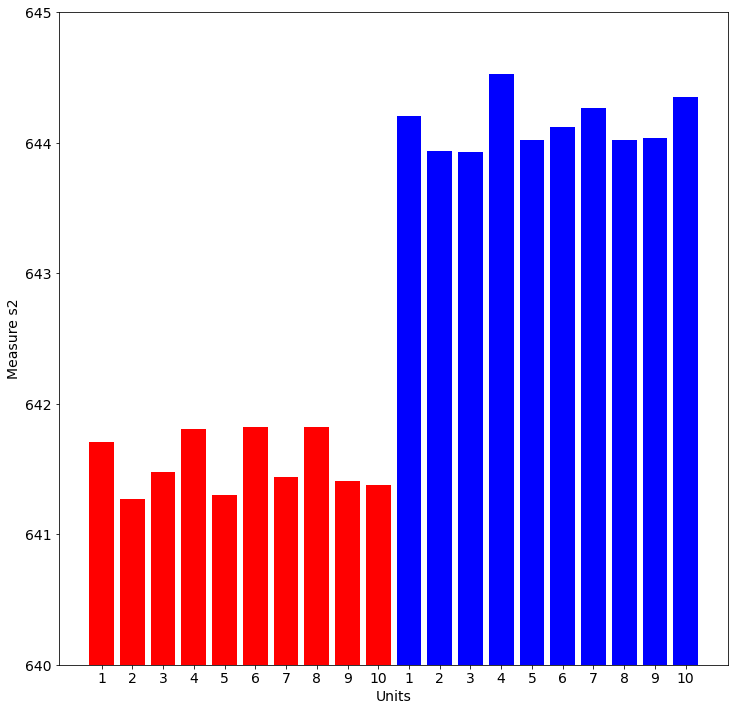

In [143]:
plt.figure(figsize = (12,12))
col = np.concatenate((np.repeat('red', 10), np.repeat('blue', 10)), axis=0)
bar_labels = list(mmtable['unit'])
x_pos = list(range(len(bar_labels)))
bars = plt.bar(x_pos, mmtable['s2'], color=col)
plt.ylim([640, 645])
plt.xlabel('Units', fontsize=14)
plt.ylabel('Measure s2', fontsize=14)
plt.xticks(x_pos, bar_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [144]:
train = pd.merge(train, train.groupby('unit', as_index=False)['cycles'].max(), how='left', on='unit')


In [145]:
train.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)


In [146]:
train.head()

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles
0,1,1,-0.001,-0.000,641.820,1589.700,1400.600,21.610,554.360,2388.060,9046.190,47.470,521.660,2388.020,8138.620,8.419,392,39.060,23.419,192
1,1,2,0.002,-0.000,642.150,1591.820,1403.140,21.610,553.750,2388.040,9044.070,47.490,522.280,2388.070,8131.490,8.432,392,39.000,23.424,192
2,1,3,-0.004,0.000,642.350,1587.990,1404.200,21.610,554.260,2388.080,9052.940,47.270,522.420,2388.030,8133.230,8.418,390,38.950,23.344,192
3,1,4,0.001,0.000,642.350,1582.790,1401.870,21.610,554.450,2388.110,9049.480,47.130,522.860,2388.080,8133.830,8.368,392,38.880,23.374,192
4,1,5,-0.002,-0.000,642.370,1582.850,1406.220,21.610,554.000,2388.060,9055.150,47.280,522.190,2388.040,8133.800,8.429,393,38.900,23.404,192


In [147]:
train['TTF'] = train['maxcycles'] - train['cycles']

In [148]:
scaler = MinMaxScaler()

In [149]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,20631.000,51.507,29.228,1.000,26.000,52.000,77.000,100.000
cycles,20631.000,108.808,68.881,1.000,52.000,104.000,156.000,362.000
op_setting1,20631.000,-0.000,0.002,-0.009,-0.002,0.000,0.002,0.009
op_setting2,20631.000,0.000,0.000,-0.001,-0.000,0.000,0.000,0.001
s2,20631.000,642.681,0.500,641.210,642.325,642.640,643.000,644.530
s3,20631.000,1590.523,6.131,1571.040,1586.260,1590.100,1594.380,1616.910
s4,20631.000,1408.934,9.001,1382.250,1402.360,1408.040,1414.555,1441.490
s6,20631.000,21.610,0.001,21.600,21.610,21.610,21.610,21.610
s7,20631.000,553.368,0.885,549.850,552.810,553.440,554.010,556.060
s8,20631.000,2388.097,0.071,2387.900,2388.050,2388.090,2388.140,2388.560


In [150]:
ntrain = train.copy()

In [151]:
ntrain.iloc[:,2:19] = scaler.fit_transform(ntrain.iloc[:,2:19])

In [152]:
ntrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,20631.000,51.507,29.228,1.000,26.000,52.000,77.000,100.000
cycles,20631.000,108.808,68.881,1.000,52.000,104.000,156.000,362.000
op_setting1,20631.000,0.499,0.126,0.000,0.414,0.500,0.586,1.000
op_setting2,20631.000,0.502,0.244,0.000,0.333,0.500,0.750,1.000
s2,20631.000,0.443,0.151,0.000,0.336,0.431,0.539,1.000
s3,20631.000,0.425,0.134,0.000,0.332,0.416,0.509,1.000
s4,20631.000,0.450,0.152,0.000,0.339,0.435,0.545,1.000
s6,20631.000,0.980,0.139,0.000,1.000,1.000,1.000,1.000
s7,20631.000,0.566,0.143,0.000,0.477,0.578,0.670,1.000
s8,20631.000,0.298,0.108,0.000,0.227,0.288,0.364,1.000


In [153]:
ntest = test.copy()

In [154]:
pd.DataFrame(ntest.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21


In [155]:
ntest.iloc[:,2:19] = scaler.transform(ntest.iloc[:,2:19])

In [156]:
ntest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,13096.000,51.544,28.289,1.000,28.000,52.000,76.000,100.000
cycles,13096.000,76.837,53.058,1.000,33.000,69.000,113.000,303.000
op_setting1,13096.000,0.499,0.127,0.029,0.414,0.500,0.586,0.948
op_setting2,13096.000,0.504,0.245,0.000,0.333,0.500,0.750,1.083
s2,13096.000,0.381,0.121,-0.024,0.297,0.377,0.461,0.931
s3,13096.000,0.372,0.109,-0.044,0.296,0.370,0.443,0.796
s4,13096.000,0.380,0.113,0.036,0.299,0.375,0.452,0.863
s6,13096.000,0.970,0.170,0.000,1.000,1.000,1.000,1.000
s7,13096.000,0.629,0.110,0.166,0.557,0.636,0.707,0.965
s8,13096.000,0.259,0.087,-0.015,0.197,0.258,0.318,0.606


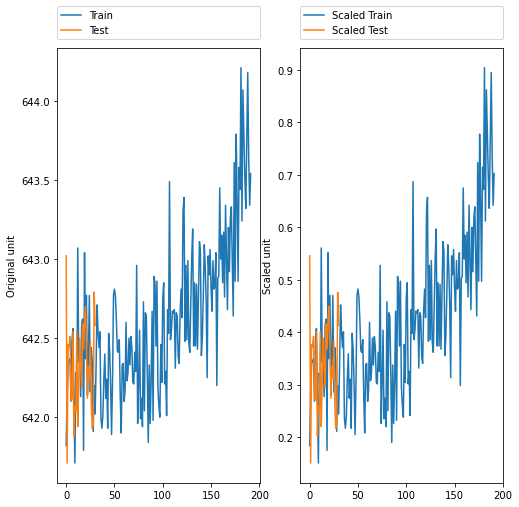

In [157]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(train[train.unit==1].s2)
plt.plot(test[test.unit==1].s2)
plt.legend(['Train','Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(ntrain[ntrain.unit==1].s2)
plt.plot(ntest[ntest.unit==1].s2)
plt.legend(['Scaled Train','Scaled Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.show()

In [158]:
def fractionTTF(dat,q):
    return(dat.TTF[q]-dat.TTF.min()) / float(dat.TTF.max()-dat.TTF.min())

In [159]:
fTTFz = []
fTTF = []

for i in range(train['unit'].min(),train['unit'].max()+1):
    dat=train[train.unit==i]
    dat = dat.reset_index(drop=True)
    for q in range(len(dat)):
        fTTFz = fractionTTF(dat, q)
        fTTF.append(fTTFz)
ntrain['fTTF'] = fTTF

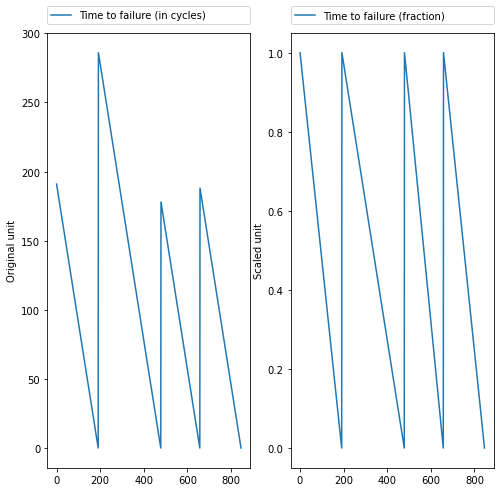

In [160]:
mx = cyclestrain.iloc[0:4,1].sum()

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(ntrain.TTF[0:mx])
plt.legend(['Time to failure (in cycles)'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(ntrain.fTTF[0:mx])
plt.legend(['Time to failure (fraction)'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.show()

In [161]:
ntrain['fTTF'].describe()

count   20631.000
mean        0.500
std         0.290
min         0.000
25%         0.249
50%         0.500
75%         0.751
max         1.000
Name: fTTF, dtype: float64

In [162]:
pd.DataFrame(ntrain.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,...,s12,s13,s14,s15,s17,s20,s21,maxcycles,TTF,fTTF


In [163]:
X_train = ntrain.values[:,1:19]
Y_train = ntrain.values[:, 21]
X_test = ntest.values[:,1:19]

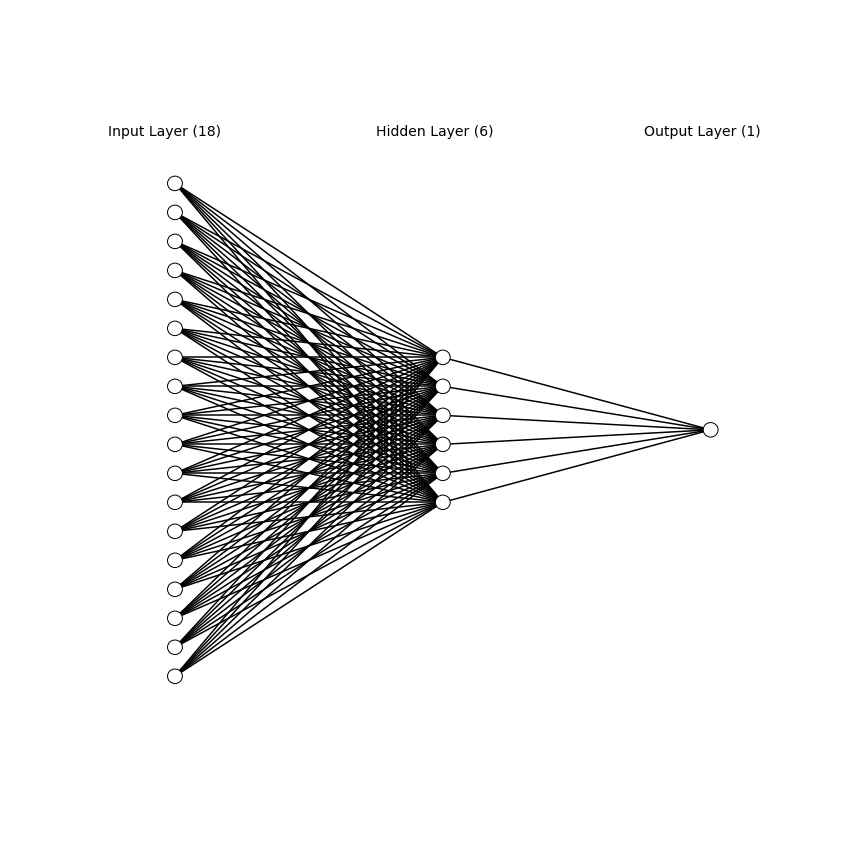

In [164]:
url = 'https://raw.githubusercontent.com/RRighart/Gatu/master/nn-18-6-1.png'
Image(url)

In [165]:
model = Sequential()
model.add(Dense(6, input_dim=18, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, nb_epoch=20)

TypeError: fit() got an unexpected keyword argument 'nb_epoch'

In [166]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [168]:
model = Sequential()
model.add(Dense(6, input_dim=18, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
645/645 [==============================] - 1s 2ms/step - loss: 0.1295
Epoch 2/20
645/645 [==============================] - 1s 2ms/step - loss: 0.0077
Epoch 3/20
645/645 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 4/20
645/645 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 5/20
645/645 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 6/20
645/645 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 7/20
645/645 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 8/20
645/645 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 9/20
645/645 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 10/20
645/645 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 11/20
645/645 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 12/20
645/645 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 13/20
645/645 [====

In [169]:
score = model.predict(X_test)

In [170]:
score[0:10]

array([[0.99434614],
       [1.02018   ],
       [1.0176209 ],
       [0.98281455],
       [1.0030323 ],
       [0.9766933 ],
       [0.9702109 ],
       [0.97247994],
       [1.0065715 ],
       [0.95720387]], dtype=float32)

In [171]:
print(score.min(), score.max())

0.063013986 1.0694822


In [172]:
test = pd.merge(test, test.groupby('unit', as_index=False)['cycles'].max(), how='left', on='unit')


In [173]:
test.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)


In [174]:
test['score'] = score

In [175]:
test.head()

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,score
0,1,1,0.002,0.000,643.020,1585.290,1398.210,21.610,553.900,2388.040,...,47.200,521.720,2388.030,8125.550,8.405,392,38.860,23.373,31,0.994
1,1,2,-0.003,-0.000,641.710,1588.450,1395.420,21.610,554.850,2388.010,...,47.500,522.160,2388.060,8139.620,8.380,393,39.020,23.392,31,1.020
2,1,3,0.000,0.000,642.460,1586.940,1401.340,21.610,554.110,2388.050,...,47.500,521.970,2388.030,8130.100,8.444,393,39.080,23.417,31,1.018
3,1,4,0.004,0.000,642.440,1584.120,1406.420,21.610,554.070,2388.030,...,47.280,521.380,2388.050,8132.900,8.392,391,39.000,23.374,31,0.983
4,1,5,0.001,0.000,642.510,1587.190,1401.920,21.610,554.160,2388.010,...,47.310,522.150,2388.030,8129.540,8.403,390,38.990,23.413,31,1.003


In [176]:
def totcycles(data):
    return(data['cycles'] / (1-data['score']))
    
test['maxpredcycles'] = totcycles(test)

In [177]:
def RULfunction(data):
    return(data['maxpredcycles'] - data['maxcycles'])

test['RUL'] = RULfunction(test)

In [178]:
test['RUL'].head()

0     145.870
1    -130.108
2    -201.252
3     201.755
4   -1679.899
Name: RUL, dtype: float64

In [179]:
t = test.columns == 'RUL'
ind = [i for i, x in enumerate(t) if x]

predictedRUL = []

for i in range(test.unit.min(), test.unit.max()+1):
    npredictedRUL=test[test.unit==i].iloc[test[test.unit==i].cycles.max()-1,ind]
    predictedRUL.append(npredictedRUL)
    
predictedRUL[0:10]

[RUL   189.302
 Name: 30, dtype: float64,
 RUL   163.011
 Name: 79, dtype: float64,
 RUL   72.204
 Name: 205, dtype: float64,
 RUL   90.846
 Name: 311, dtype: float64,
 RUL   110.148
 Name: 409, dtype: float64,
 RUL   118.048
 Name: 514, dtype: float64,
 RUL   102.893
 Name: 674, dtype: float64,
 RUL   70.372
 Name: 840, dtype: float64,
 RUL   146.415
 Name: 895, dtype: float64,
 RUL   101.643
 Name: 1087, dtype: float64]

In [180]:
len(predictedRUL)

100

In [181]:
xtrueRUL = list(RUL.loc[:,0])
otrueRUL = []

for i in range(0,len(xtrueRUL)):
    otrueRUL = np.concatenate((otrueRUL, list(reversed(np.arange(xtrueRUL[i])))))

In [200]:
xpredictedRUL = list(round(x) for x in predictedRUL)
opredictedRUL = []
print(xpredictedRUL)
print('xp')
list(reversed(np.arange(xpredictedRUL[1])))
opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[1])))))
#for i in range(0,len(xpredictedRUL)):
#    list(reversed(np.arange(xpredictedRUL[i]
#opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[i])))))
 #opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[1])))))

[RUL   189.000
Name: 30, dtype: float64, RUL   163.000
Name: 79, dtype: float64, RUL   72.000
Name: 205, dtype: float64, RUL   91.000
Name: 311, dtype: float64, RUL   110.000
Name: 409, dtype: float64, RUL   118.000
Name: 514, dtype: float64, RUL   103.000
Name: 674, dtype: float64, RUL   70.000
Name: 840, dtype: float64, RUL   146.000
Name: 895, dtype: float64, RUL   102.000
Name: 1087, dtype: float64, RUL   106.000
Name: 1170, dtype: float64, RUL   111.000
Name: 1387, dtype: float64, RUL   89.000
Name: 1582, dtype: float64, RUL   147.000
Name: 1628, dtype: float64, RUL   168.000
Name: 1704, dtype: float64, RUL   113.000
Name: 1817, dtype: float64, RUL   64.000
Name: 1982, dtype: float64, RUL   67.000
Name: 2115, dtype: float64, RUL   106.000
Name: 2250, dtype: float64, RUL   30.000
Name: 2434, dtype: float64, RUL   99.000
Name: 2582, dtype: float64, RUL   186.000
Name: 2621, dtype: float64, RUL   128.000
Name: 2751, dtype: float64, RUL   44.000
Name: 2937, dtype: float64, RUL   179.0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [183]:
opredictedRUL

[]

AttributeError: 'list' object has no attribute 'max'

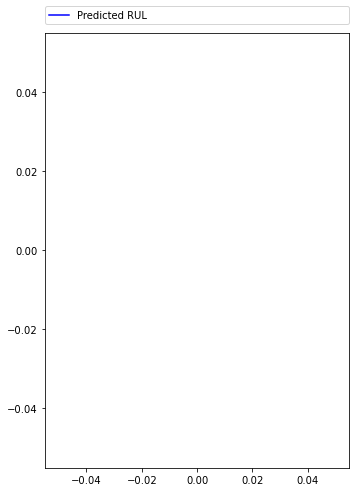

In [186]:
mx = 1000
fig = plt.figure(figsize = (12, 8))
fig.add_subplot(1,2,1)
plt.plot(opredictedRUL[0:mx], color='blue')
plt.legend(['Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylim(0, opredictedRUL[0:mx].max()+10)
plt.ylabel('RUL (cycles)')

fig.add_subplot(1,2,2)
plt.plot(otrueRUL[0:mx], color='purple')
plt.legend(['True RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('RUL (cycles)')
plt.ylim(0,otrueRUL[0:mx].max()+10)
plt.show()

In [201]:
ll

total 45248
-rw-r--r-- 1 jovyan      656 Dec 30 23:15 appveyor.yml
-rw-r--r-- 1 jovyan      535 Dec 30 23:15 CHANGES.txt
-rw-r--r-- 1 jovyan  1340088 Dec 31 01:50 gatu31122020goldi.ipynb
-rw-r--r-- 1 jovyan     1489 Dec 30 23:15 LICENSE.txt
-rw-r--r-- 1 jovyan     1139 Dec 30 23:15 Makefile
-rw-r--r-- 1 jovyan      106 Dec 30 23:15 MANIFEST.in
-rw-r--r-- 1 jovyan     1397 Dec 30 23:15 README.rst
-rw-r--r-- 1 jovyan       13 Dec 30 23:15 requirements.txt
-rw-r--r-- 1 jovyan      429 Dec 31 00:18 RUL_FD001.txt
-rw-r--r-- 1 jovyan     1110 Dec 31 00:18 RUL_FD002.txt
-rw-r--r-- 1 jovyan      428 Dec 31 00:18 RUL_FD003.txt
-rw-r--r-- 1 jovyan     1084 Dec 31 00:18 RUL_FD004.txt
-rw-r--r-- 1 jovyan     3170 Dec 30 23:15 setup.py
-rw-r--r-- 1 jovyan  2228855 Dec 31 00:19 test_FD001.txt
-rw-r--r-- 1 jovyan  5734587 Dec 31 00:19 test_FD002.txt
-rw-r--r-- 1 jovyan  2826651 Dec 31 00:19 test_FD003.txt
-rw-r--r-- 1 jovyan  6957759 Dec 31 00:20 test_FD004.txt
drwxr-xr-x 2 jovyan     4096 Dec 30 23:

In [204]:
ll


total 24
-rw-r--r-- 1 jovyan    8 Oct 29 10:01 apt.txt
-rw-r--r-- 1 jovyan  226 Oct 29 10:01 environment.yml
-rw-r--r-- 1 jovyan 2202 Dec 30 23:13 Index.ipynb
-rw-r--r-- 1 jovyan 5736 Dec 30 23:17 Untitled.ipynb
drwxr-xr-x 6 jovyan 4096 Dec 31 01:51 ZigZag/


In [205]:
ll

total 1336
-rw-r--r-- 1 jovyan       8 Oct 29 10:01 apt.txt
-rw-r--r-- 1 jovyan     226 Oct 29 10:01 environment.yml
-rw-r--r-- 1 jovyan 1342660 Dec 31 01:53 gatuGold.ipynb
-rw-r--r-- 1 jovyan    2202 Dec 30 23:13 Index.ipynb
-rw-r--r-- 1 jovyan    5736 Dec 30 23:17 Untitled.ipynb
drwxr-xr-x 6 jovyan    4096 Dec 31 01:53 ZigZag/


In [206]:
cd ZigZag

/home/jovyan/binder/ZigZag


In [207]:
ll


total 45248
-rw-r--r-- 1 jovyan      656 Dec 30 23:15 appveyor.yml
-rw-r--r-- 1 jovyan      535 Dec 30 23:15 CHANGES.txt
-rw-r--r-- 1 jovyan  1340088 Dec 31 01:50 gatu31122020goldi.ipynb
-rw-r--r-- 1 jovyan     1489 Dec 30 23:15 LICENSE.txt
-rw-r--r-- 1 jovyan     1139 Dec 30 23:15 Makefile
-rw-r--r-- 1 jovyan      106 Dec 30 23:15 MANIFEST.in
-rw-r--r-- 1 jovyan     1397 Dec 30 23:15 README.rst
-rw-r--r-- 1 jovyan       13 Dec 30 23:15 requirements.txt
-rw-r--r-- 1 jovyan      429 Dec 31 00:18 RUL_FD001.txt
-rw-r--r-- 1 jovyan     1110 Dec 31 00:18 RUL_FD002.txt
-rw-r--r-- 1 jovyan      428 Dec 31 00:18 RUL_FD003.txt
-rw-r--r-- 1 jovyan     1084 Dec 31 00:18 RUL_FD004.txt
-rw-r--r-- 1 jovyan     3170 Dec 30 23:15 setup.py
-rw-r--r-- 1 jovyan  2228855 Dec 31 00:19 test_FD001.txt
-rw-r--r-- 1 jovyan  5734587 Dec 31 00:19 test_FD002.txt
-rw-r--r-- 1 jovyan  2826651 Dec 31 00:19 test_FD003.txt
-rw-r--r-- 1 jovyan  6957759 Dec 31 00:20 test_FD004.txt
drwxr-xr-x 2 jovyan     4096 Dec 30 23:

In [208]:
cd ..

/home/jovyan/binder


In [209]:
ll

total 1336
-rw-r--r-- 1 jovyan       8 Oct 29 10:01 apt.txt
-rw-r--r-- 1 jovyan     226 Oct 29 10:01 environment.yml
-rw-r--r-- 1 jovyan 1342660 Dec 31 01:53 gatuGold.ipynb
-rw-r--r-- 1 jovyan    2202 Dec 30 23:13 Index.ipynb
-rw-r--r-- 1 jovyan    5736 Dec 30 23:17 Untitled.ipynb
drwxr-xr-x 6 jovyan    4096 Dec 31 01:53 ZigZag/
